<a href="https://colab.research.google.com/github/aarondav85/TrabajoParcial/blob/master/Proyecto_Procesos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Ingrese el ID de usuario: 32292
Enlace:  https://es.stackoverflow.com/users/32292?tab=tags 



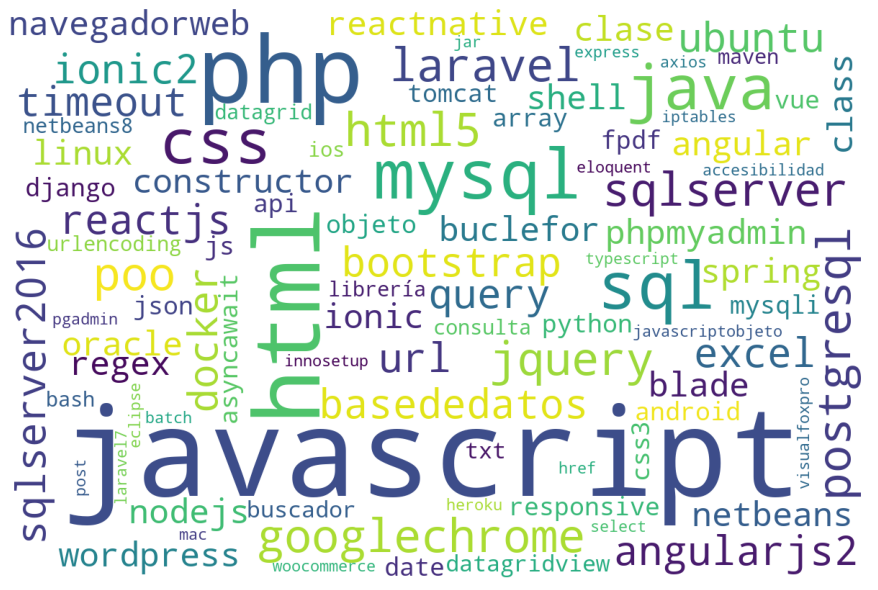

In [ ]:
from bs4 import BeautifulSoup
import requests
import urllib.request
from wordcloud import  WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import sys

url = 'https://es.stackoverflow.com/users/'
id = input("Ingrese el ID de usuario: ")
url = url + id +"?tab=tags"
response = requests.get(url)
soup = BeautifulSoup(response.content, 'html.parser')
codigo= soup.find("div", {"class":"user-tab-content"})

try:
	datos = codigo.find_all('div', class_='answer-votes')
except AttributeError:
	print("El id es incorrecto.\n")
	sys.exit()
 
print("Enlace: ", url,'\n')
etiquetas = codigo.find_all('a', class_='post-tag')
paginacion = soup.find("div", {"class":"s-pagination pager fr"})

try:
	paginas = paginacion.find_all('a', class_='s-pagination--item js-pagination-item')
except AttributeError:
	print("El usuario no tiene etiquetas.\n")
	sys.exit()
 
numeroPaginas = len(paginas)
if numeroPaginas > 1:
	for x in range(2, numeroPaginas+1):
		newUrl = url + "&sort=votes&page=" + str(x)
		response = requests.get(newUrl)
		soup = BeautifulSoup(response.content, 'html.parser')
		codigo= soup.find("div", {"class":"user-tab-content"})
		masDatos = codigo.find_all('div', class_='answer-votes')
		masTags = codigo.find_all('a', class_='post-tag')
		datos = datos + masDatos
		etiquetas = etiquetas + masTags
		#print("Entro a: "+ str(x) +"paginas.")

"Creacion de archivo txt que contendra las etiquetas repetidas segun su numero"
archivo = open("Prueba.txt", "w")
for longitud in range(0,len(datos)):
	if(int(datos[longitud].text) != 0):
		for rep in range(0, int(datos[longitud].text)):
			archivo.write(etiquetas[longitud].text)
			archivo.write('\n')
archivo.close()
"Fin del archivo"

"Creacion de los datos para la nube"
stopwords = set(STOPWORDS)
nubeDP = open('Prueba.txt', 'r+')
textdata = nubeDP.read().replace('-', '')
wordcloud = WordCloud(
    background_color='white',
    max_words=700,
		width=1200, 
		height=800,
		collocations = False
).generate(textdata)

plt.figure(figsize = (12, 10), facecolor = None) 
plt.imshow(wordcloud)
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show() 